In [18]:
from glob import glob
from vcf import Reader as vcf_reader
from numpy import polyfit
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks')

In [19]:
with open('/home/hcampos/common_bioinformatics/files/vcf_somsig/mvf/DT_uy_4_TU_mc10_mvf008_sp005.snp.filter.som.recode.vcf') as f:
    records = [x for x in vcf_reader(f)]

In [20]:
r0 = records[0]
print (records[0])

Record(CHROM=chr1, POS=11110528, REF=T, ALT=[C])


In [21]:
r0.samples[1]
print (r0.samples)

[Call(sample=NORMAL, CallData(GT=0/0, GQ=None, DP=49, RD=49, AD=0, FREQ=0%, DP4=7,42,0,0)), Call(sample=TUMOR, CallData(GT=0/1, GQ=None, DP=41, RD=24, AD=17, FREQ=41.46%, DP4=7,17,2,15))]


In [22]:
r0.genotype('TUMOR')

Call(sample=TUMOR, CallData(GT=0/1, GQ=None, DP=41, RD=24, AD=17, FREQ=41.46%, DP4=7,17,2,15))

In [23]:
def get_vcf_info(filename):
    data = []
    with open(filename) as f:
        for r in vcf_reader(f):
            v = r.genotype('TUMOR')['AD'] / r.genotype('TUMOR')['DP']
           # print (v)
            data.append([r.CHROM, r.POS, r.REF, str(r.ALT[0]), v])
    df_mvf = pd.DataFrame(data, columns=['chrom', 'pos', 'ref', 'alt', 'var_all_freq'])
    
    return df_mvf

In [24]:
df_mvf1 = get_vcf_info('/home/hcampos/common_bioinformatics/files/vcf_somsig/mvf/DT_uy_4_TU_mc10_mvf008_sp005.snp.filter.som.recode.vcf')

In [25]:
df_mvf_005 = df_mvf1[df_mvf1.ref != 'N']

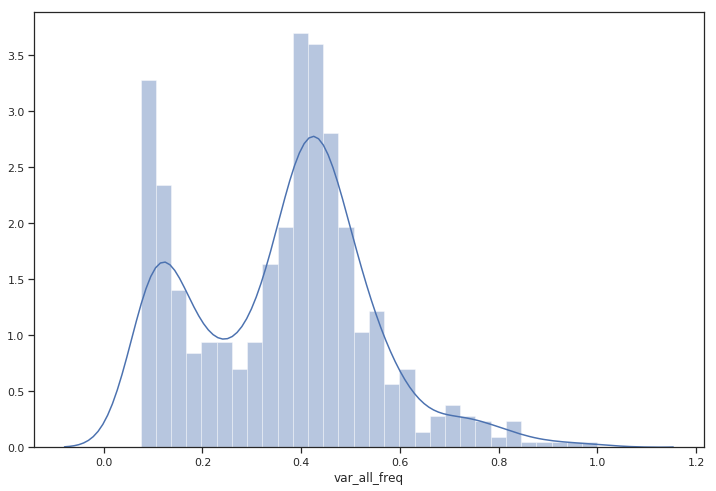

In [26]:
sns.distplot(df_mvf_005.var_all_freq, bins=30)